[1] "Paretodiagrammet ger en grafisk representation för att visa den kumulativa procentandelen av en uppsättning av kategoriserade data. I detta fall ett diagram över fel per fordon i mtcars-datasetet. Genom att använda Pareto-diagrammet kan vi visuellt identifiera de fordon som bidrar mest till den totala felmängden för att  fokusera resurser på att åtgärda de viktigaste problemen först."

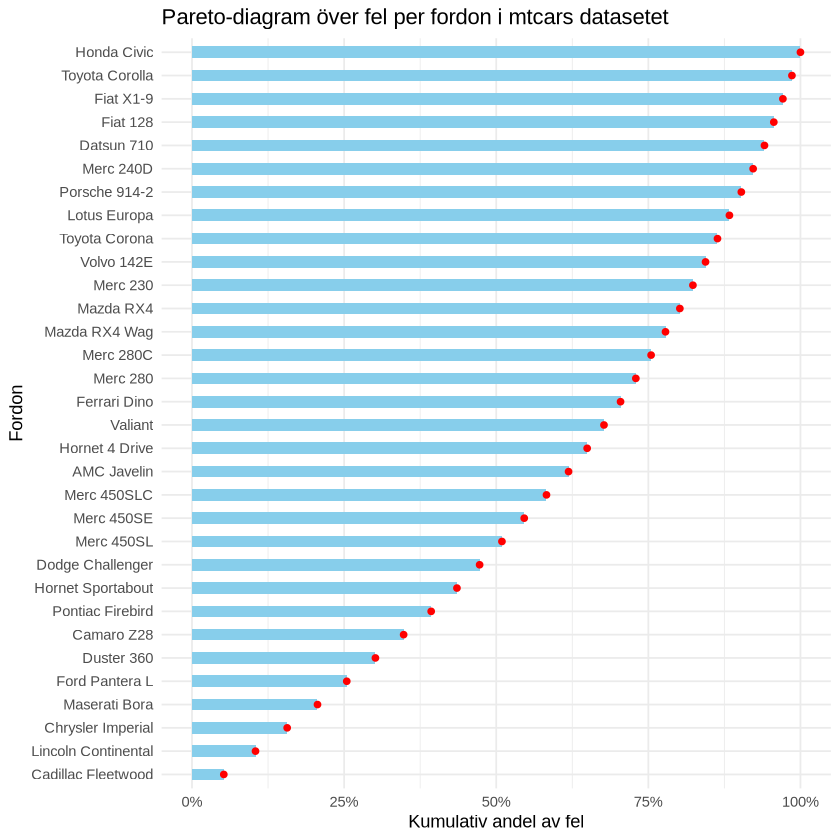

In [1]:
# ***********************************************************************************************
# Titel: Exempel på diagramtyper i R - PARETODIAGRAM
# Beskrivning: Illustrera exempel med diagramtyper i R
# Skapad av: Frank Weideskog(frank.weideskog@scb.se), ID: SCBFRWE
# 2024-06-17 (SCBFRWE):En första version 
#*************************************************************************************************
# Rensar minnet i R
rm(list=ls())				
# ************************************************************************************************
#Installerar/aktiverar relevanta R-paket (R-packages):
suppressMessages({
  install.packages("ggplot2")
  library(ggplot2)
})   
# ************************************************************************************************

#PARETODIAGRAM

# Skapa en dataram för mtcars datasetet
mtcars_df <- mtcars

# Beräkna totalt antal fel per fordon
mtcars_df$total_errors <- rowSums(mtcars_df[, c("mpg", "cyl", "disp", "hp", "drat", "wt", "qsec", "vs", "am", "gear", "carb")])

# Sortera fordonen efter antal fel i fallande ordning
mtcars_df <- mtcars_df[order(mtcars_df$total_errors, decreasing = TRUE), ]

# Skapa en kumulativ summa av fel
mtcars_df$cumulative_errors <- cumsum(mtcars_df$total_errors)

# Beräkna den totala summan av fel
total_errors <- sum(mtcars_df$total_errors)

# Skapa en variabel för den proportionella kumulativa summan
mtcars_df$cumulative_errors_proportion <- mtcars_df$cumulative_errors / total_errors

# Skapa ett Pareto-diagram
ggplot(mtcars_df, aes(x = reorder(row.names(mtcars_df), -total_errors), y = cumulative_errors_proportion)) +
  geom_bar(stat = "identity", fill = "skyblue", width = 0.5) +
  geom_point(color = "red") + # Använd geom_point istället för geom_line
  scale_y_continuous(labels = scales::percent) +
  coord_flip() +
  labs(title = "Pareto-diagram över fel per fordon i mtcars datasetet",
       x = "Fordon",
       y = "Kumulativ andel av fel") +
  theme_minimal()

text<-'Paretodiagrammet ger en grafisk representation för att visa den kumulativa procentandelen av en uppsättning av kategoriserade data. I detta fall ett diagram över fel per fordon i mtcars-datasetet. Genom att använda Pareto-diagrammet kan vi visuellt identifiera de fordon som bidrar mest till den totala felmängden för att  fokusera resurser på att åtgärda de viktigaste problemen först.'
text
